<h2 style='text-align:center;'><b> Bank Marketing Campaign: Term Deposit</b></h1>
<h5 style="text-align: center;">Ardi Arunaditya JCDS 2604 - 021</h2>

---

# **1. Introduction**

### **1.1 Business Context**
A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

Term deposits are a crucial product for banks, offering a secure investment option for customers while providing a steady source of funds for the bank’s lending and operational activities. However, promoting term deposits requires a nuanced approach, as customers have varying financial needs, risk appetites, and savings preferences. With increasing competition in the financial industry, banks need to employ data-driven strategies to effectively target the right customers and maximize the return on their marketing investments.

### **1.2 Business Problem**

Marketing campaigns for term deposits often face low conversion rates due to inefficient targeting. Blanket marketing approaches lead to wasted resources, customer disengagement, and missed opportunities to convert high-potential leads. The challenge lies in identifying customers most likely to subscribe to a term deposit and designing targeted campaigns that appeal to their specific financial behaviors and preferences.

### **1.3 Business Goal**
The goal is to develop a machine learning model that predicts the likelihood of a customer subscribing to a term deposit account 

### **1.4 Metric Evaluation**
Our primary focus is on customer who deposit, so we will assign the target as such:
- 1: Customer who deposit
- 0: Customer who doesn't deposit

`Type 1 Error`    : False Positive (customer who are predicted to subscribe to a term deposit but actually doesn't subscribe) <br>
Consequence     : Marketing Campaign Inefficiency, Wasted Resources, Customer Dissatisfaction <br>

`Type 2 Error`    : False Negative (customer who are predicted to not subscribe to a term deposit but actually does subscribe)<br>
Consequence     : Reduced Customer Engagement

I will use **Precision** for our evaluation metric, because **Precision** aims to minimize **type 1 error**, therefore increasing the efficiency of the marketing campaign and less wasted resource.

To give a perspective on why precision are important, here are case example: <br>

**Assumptions**:
- Amount of customer = 10000
    - customer who subscribe to a term deposit = 4000
    - customer who doesn't subscribe to a term deposit = 6000
- Minimum amount to deposit = $5000 ([Source](https://www.commbank.com.au/banking/term-deposits.html))
- Assuming all the customer who subscribe to a term deposit are all for 12 Months; the interest rate will be = 4.35% ([Source](https://www.commbank.com.au/banking/term-deposits.html))
- Marketing campaign budget/cost based on revenue = 14% ([Source](https://hawksem.com/blog/what-percentage-of-revenue-should-be-spent-on-marketing/#:~:text=Average%20marketing%20budgets%20vary%20from,Banking%20%26%20finance%3A%2014%25))

**Calculations**:
- $\ \text{Revenue}     = \text{customer who subscribe to a term deposit * minimum amount to deposit * interest rate (12 month)}$<br>
$\   \text{Revenue}     = 4000 * 5000 * 0.0435= 870,000$

- $\ \text{Marketing budget/cost}   = \text{0.14 * Revenue}$ <br>
$\ \text{Marketing budget/cost}     = 0.14 * 870,000 = 121,800$

**Marketing budget/cost per Customer**: <br>

$\ \text{Marketing budget/cost per Customer} = \frac{\text{Marketing budget/cost}}{\text{Amount of customer}}$ <br>

$\ \text{Marketing budget/cost per Customer} = \frac{121,800}{10,000} = {12.18}$

**Based on the case example**:

**Precision**:
- Precision is about reducing false positives (customers incorrectly predicted to subscribe but do not).
- Each false positive avoided saves the marketing cost per customer: $12.18.

### **1.5 Analytical Approach**
To address the problem and meet the campaign’s objectives, the following steps will be undertaken:

1. Data Understanding:
    - Collecting Data
    - Describing Data
    - Exploring Data (EDA)
2. Data Preparation:
    - Cleaning Data
    - Feature Engineering (if necessary)
3. Modelling
    - Preprocessing
    - Data Spliting
    - Model Benchmark
    - Hyperparameter Tuning
4. Evaluation
    - Final Result Comparison (Before and After Tuning)
    - Confusion Matrix
    - Feature Importace
    - SHAP

5. Conclusion and Recommendation

# **2. Data Understanding**

> Import Library

In [2211]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from category_encoders import BinaryEncoder, OrdinalEncoder

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV

# Algorithm ML (choose between classifcation or regression)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# Metrics (classification)
# Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss  

# Confusion Matrix and Reports
from sklearn.metrics import classification_report, confusion_matrix   

# Curve-Based Metrics
from sklearn.metrics import precision_recall_curve, roc_curve, auc 

# Machine Learning Explainer
import shap

import warnings
warnings.filterwarnings('ignore')

## **2.1 Collecting Data**

In [2133]:
df = pd.read_csv(r"C:\Users\Ardi Arunaditya\Documents\JCDS PURWADHIKA\Module 3\Capstone Project 3\Data\data_bank_marketing_campaign.csv")
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [2134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


The dataset consists of 7813 rows with 11 columns with information on `customer profile`, `marketing data`, and `target`. <br>
- **Customer Profile**

| Column  | Description                                     |
|---------|-------------------------------------------------|
| `age`     | The age of customer                             |
| `job`     | The type of customer job                        |
| `balance` | The balance of customer's account               |
| `housing` | Whether or not the customer has a housing loan  |
| `loan`    | Whether or not the customer has a personal loan |

- **Marketing Data**

| Column   | Description                                                       |
|----------|-------------------------------------------------------------------|
| `contact`  | Contact communication type                                        |
| `month`    | Last contact day of the month                                     |
| `campaign` | Number of contacts performed during the marketing campaign                      |
| `pdays`    | Number of days that passed by after the client was last contacted |
| `poutcome` | Outcome of the previous marketing campaign                        |

- **Target**

| Column  | Description                                       |
|---------|---------------------------------------------------|
| `deposit` | Whether the customer subscribed to a term deposit |

## **2.2 Describing Data**

In [2135]:
display(df.describe(),
        df.describe(include= object))

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


In [2136]:
# Detailed Data Information
df_desc = []

for i in df.columns:
    df_desc.append([i,
                    df[i].dtypes,
                    df[i].min(),
                    df[i].max(),
                    df[i].isna().sum(),
                    round((df[i].isna().sum()/len(df)*100),2),
                    df[i].nunique(),
                    df[i].unique()])

df_deepInfo = pd.DataFrame(df_desc, columns = ['columns', 'data_type', "min", "max", 'null', 'null%', 'unique','sample'])
print(f"Amount of Columns: {len(df_deepInfo.values)}")
print(f"Amount of Data: {len(df)}")
print(df.dtypes.value_counts())
df_deepInfo

Amount of Columns: 11
Amount of Data: 7813
object    7
int64     4
Name: count, dtype: int64


,columns,data_type,min,max,null,null%,unique,sample
0,age,int64,18,95,0,0.0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,admin.,unknown,0,0.0,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,-6847,66653,0,0.0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,no,yes,0,0.0,2,"[no, yes]"
4,loan,object,no,yes,0,0.0,2,"[no, yes]"
5,contact,object,cellular,unknown,0,0.0,3,"[cellular, telephone, unknown]"
6,month,object,apr,sep,0,0.0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,1,63,0,0.0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,-1,854,0,0.0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,failure,unknown,0,0.0,4,"[unknown, other, failure, success]"


Insights:
- There are no missing values
- In some columns, there are `unknown` values
- in `pdays` and `balance` there are minus values

In [2137]:
unknown_col = list(df.select_dtypes(np.object_).columns)

df_unknown = []

for i in unknown_col:
    df_unknown.append([i,
                       df[i].str.contains('unknown').sum(),
                       round((df[i].str.contains('unknown').sum()/len(df)*100),2)])

unknown_info = pd.DataFrame(df_unknown, columns= ["Column", "Unknown", "Unknown %"])
unknown_info
    

,Column,Unknown,Unknown %
0,job,54,0.69
1,housing,0,0.00
2,loan,0,0.00
3,contact,1639,20.98
4,month,0,0.00
5,poutcome,5819,74.48
6,deposit,0,0.00


Insights:
- Low percentage of `unknown` value (0.69) in `job`
- Medium percentage of `unknown` value (20.98) in `contact`
- High percentage of `unknown` value (74.48) in `poutcome`

## **2.3 Exploring Data (EDA)**

### **2.3.1 Distribution**

#### **A. Numerical**

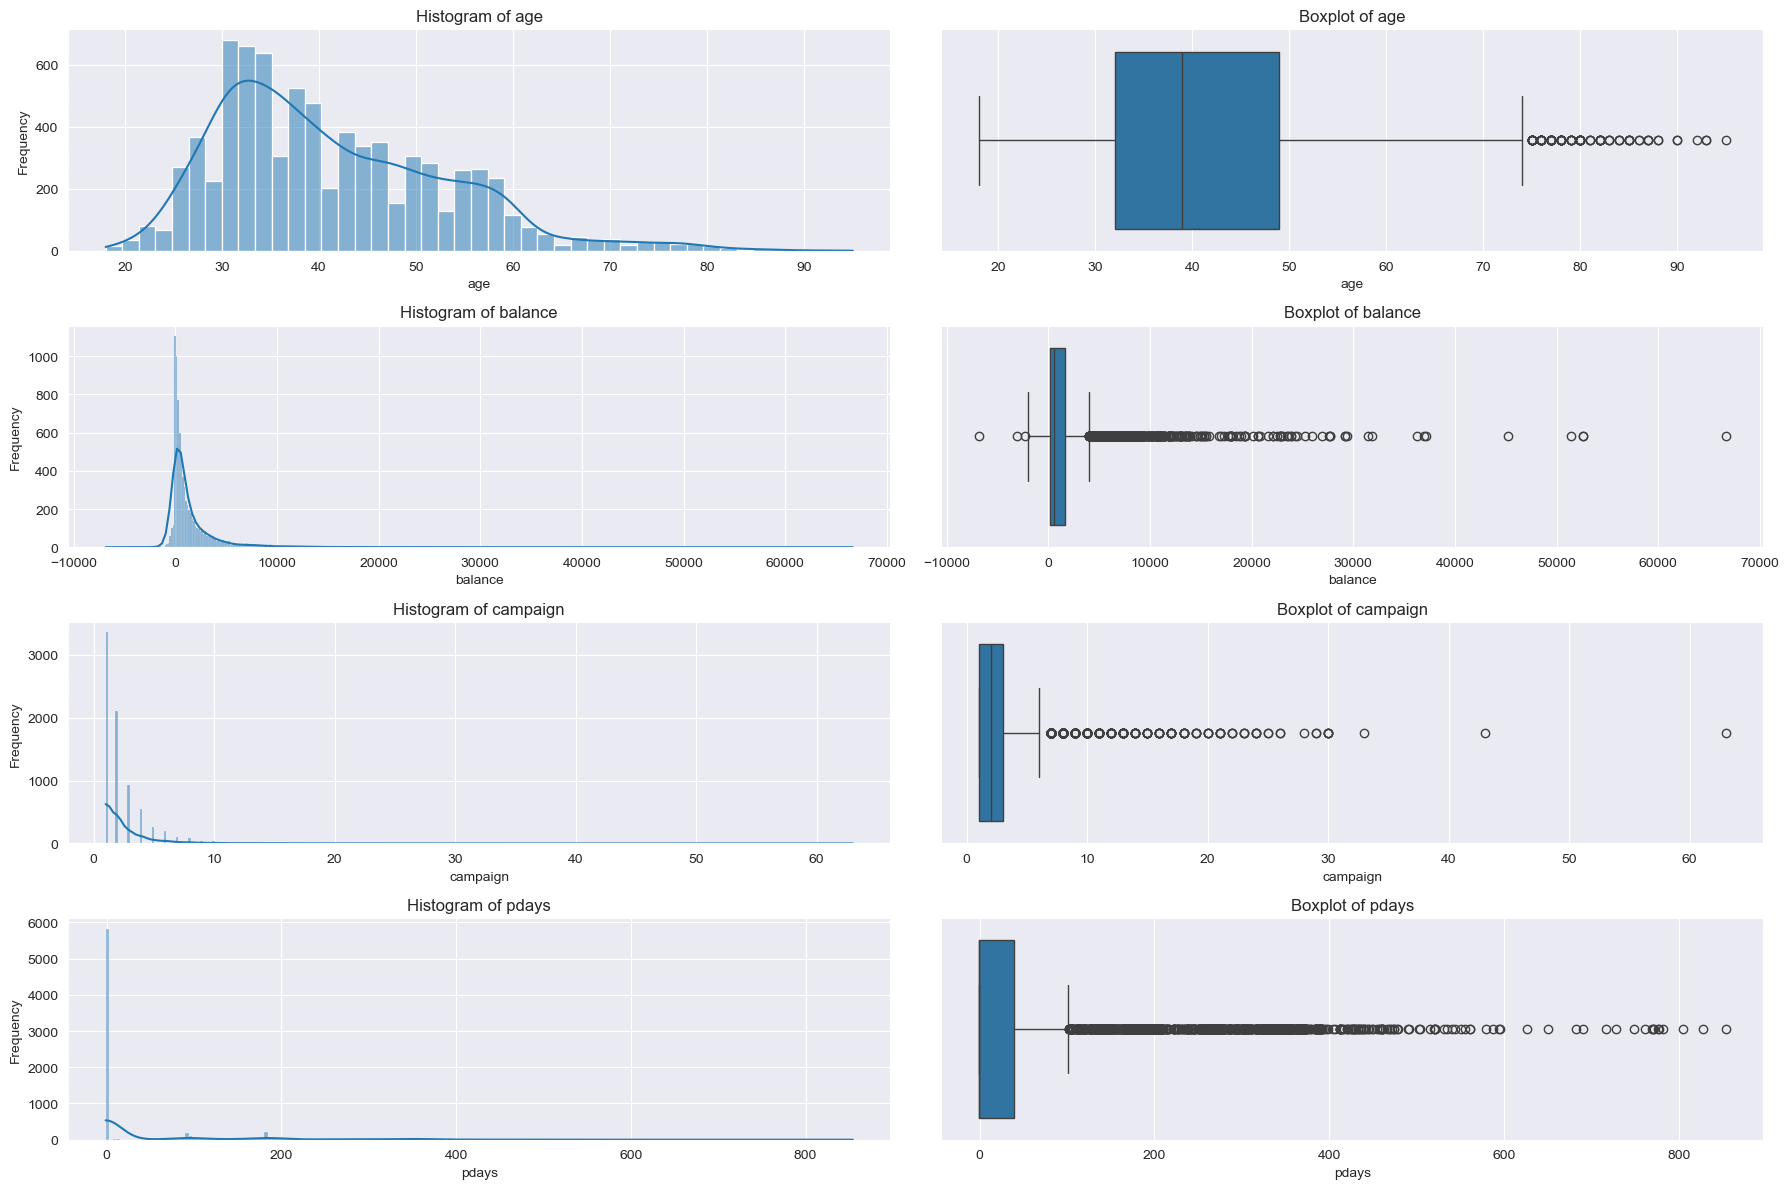

In [2138]:
numerical = list(df.select_dtypes(include= np.number).columns)

plt.figure(figsize=(18, 12))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(df[col], kde= True)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

sns.set_style("darkgrid")
plt.tight_layout()
plt.show()

Insights:
- All numerical features are not normally distributed
- All numerical features have outliers

#### **B. Categorical**

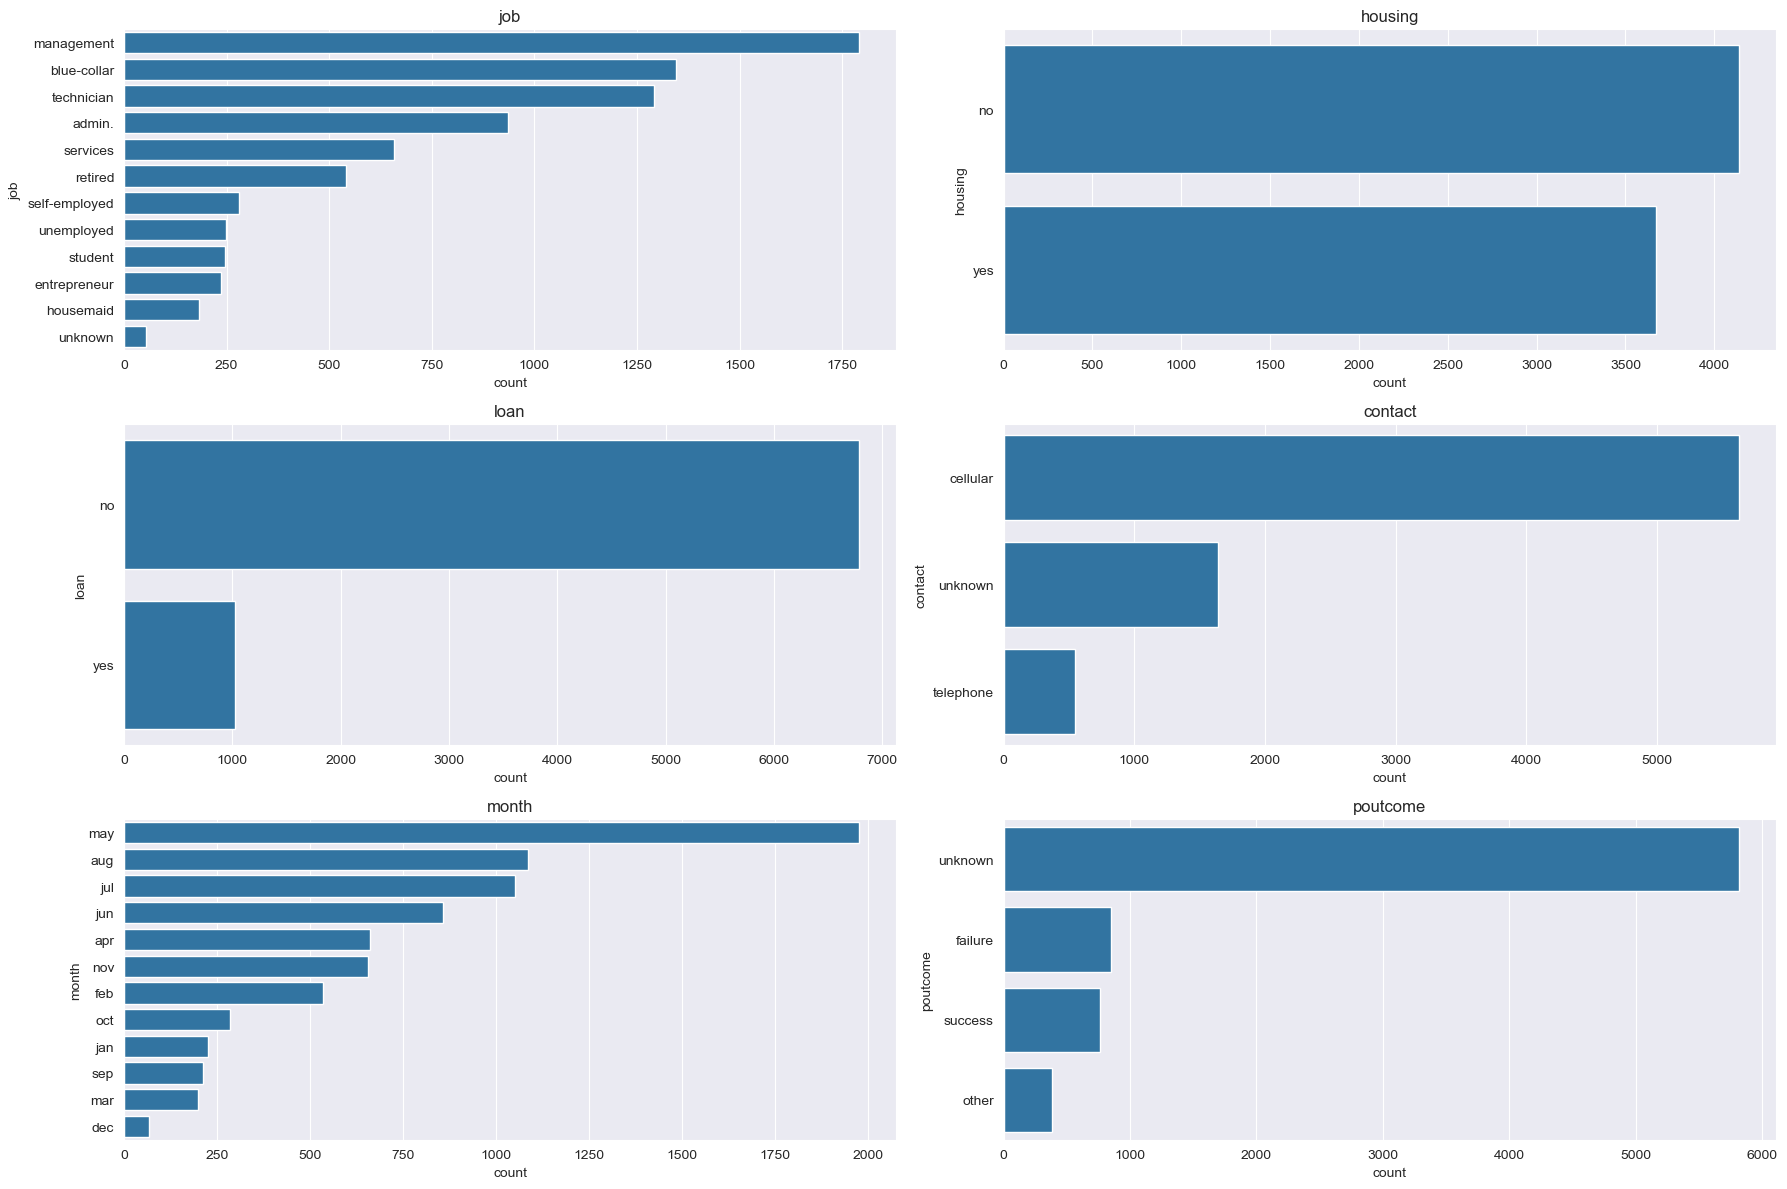

In [2139]:
categorical = list(df.select_dtypes(include= np.object_).columns)

fig, axes = plt.subplots(3, 2, figsize=(18, 12)) 
for i, j in zip(categorical, axes.flatten()):
    ax = sns.countplot(data=df, y= i, ax= j, order=df[i].value_counts().index )
    ax.set_title(f'{i}', size = 12) 

sns.set_style("darkgrid")
plt.tight_layout()
plt.show()

insights:
- Majority of job for customer of this bank is **management**
- The difference between customers with a housing loan and those without is not significant.
- Majority of customer does not have loan
- Majority of customer are contacted by cellular
- Customer are contacted more about marketing campaign in second and third quarted of the year
- Majority of the outcome from the campaign are unknown

### **2.3.2 Correlation**

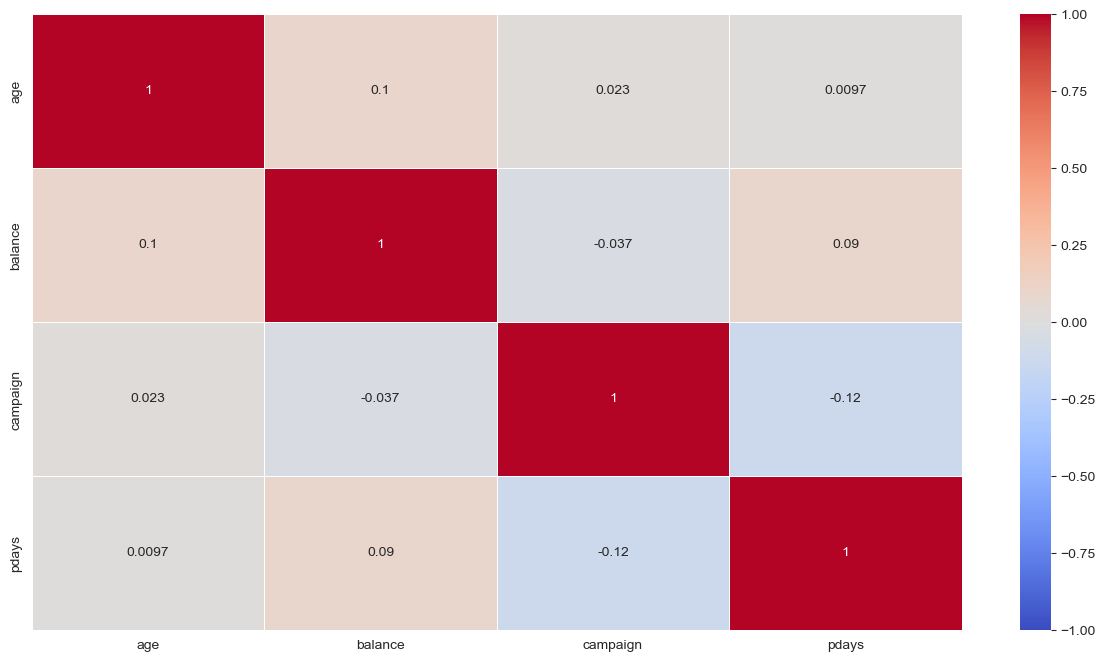

In [2140]:
plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes(include= np.number).corr('spearman'), vmin=-1, vmax=1, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

Correlation Insight:
- age and balance = 0.1; age and balance shows a positive but weak correlation

- age and campaign = 0.023; age and campaign shows a positive but weak to no correlation

- age and pdays = 0.0097; age and pdays shows a positive but weak to no correlation

- balance and campaign = -0.037; balance and campaign shows a negative but weak to no correlation

- balance and pdays = 0.09; balance and pdays shows a positive but weak correlation

- campaign and pdays = -0.12; campaign and pdays shows a negative but weak correlation

### **2.3.3 Duplicate**

In [2141]:
print(f"Amount of Duplicated Data: {df.duplicated().sum()}")
print(f"Percentage of Duplicated Data: {round(df.duplicated().sum()/len(df)*100, 2)} %")
df[df.duplicated]

Amount of Duplicated Data: 8
Percentage of Duplicated Data: 0.1 %


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


Insight:
- In this dataset there are 8 data that are duplicated, although we can not confirm if this data is actually a duplicate because there isn't any customer id data, but the probability of having the same value for each columns is very slim.

### **2.3.3 Outlier**

In [2142]:
outlier_info = []

for i in numerical:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outlier = df[(df[i] < lower_bound) | (df[i] > upper_bound)]

    outlier_info.append([i,
                        len(outlier),
                        round(len(outlier) / len(df[i])*100, 2)])

df_outlier = pd.DataFrame(outlier_info, columns= ["Column", "Amount of Outlier", "Percentage of Outlier (%)"]).sort_values(["Percentage of Outlier (%)"], ascending= False)
df_outlier

,Column,Amount of Outlier,Percentage of Outlier (%)
3,pdays,1454,18.61
1,balance,736,9.42
2,campaign,429,5.49
0,age,121,1.55


Insight:
- All numerical columns has a variative amount outliers
- The highest amount is in `pdays`
- The lowest amount is in `age`

# **3. Data Preparation**

## **3.1 Data Cleaning**

### **3.1.1 Duplicate**

In [2143]:
df.drop_duplicates(inplace= True)

- As mention before, because the possibility is very slim to have every data in each column is the same in a different customer, I will drop the duplicates.

### **3.1.2 Anomaly**

> **changing `admin.` to `admin`**

In [2144]:
df["job"] = df["job"].replace("admin.", "admin")

#### **A. Unknown Value**

> **Unknown Value in Column `job`**

- **Samples**

In [2145]:
df[df["job"] == "unknown"].sample(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
4478,78,unknown,2235,no,no,telephone,apr,3,-1,unknown,yes
6845,77,unknown,397,no,no,telephone,nov,1,185,success,no
6772,47,unknown,677,no,no,cellular,apr,2,86,failure,yes
2372,53,unknown,0,no,no,cellular,aug,5,-1,unknown,no
2272,49,unknown,341,yes,yes,unknown,may,2,-1,unknown,yes


- **Proportion**

In [2146]:
pd.DataFrame({"Count": df["job"].value_counts(),
              "Proportion (%)": round(df["job"].value_counts(normalize=True)*100, 2)})

,Count,Proportion (%)
job,,
management,1789,22.92
blue-collar,1343,17.21
technician,1289,16.52
admin,936,11.99
services,658,8.43
retired,540,6.92
self-employed,280,3.59
unemployed,249,3.19
student,247,3.16


- **Correlation to Target**

In [2147]:
unknown_job = df.copy()

unknown_job["is_unknown"] = (unknown_job['job'] == 'unknown').astype(int)
unknown_job["is_deposit"] = (unknown_job['deposit'] == 'yes').astype(int)

job_corr = round(unknown_job["is_unknown"].corr(unknown_job["is_deposit"], method= "spearman"), 5)
job_corr

0.0006

Because of the low proportion and low almost to no correlation with the target, and as it might act as a noice, therefore reducing model performance, I will drop the `unknown` values in `job` 

In [2148]:
df.drop(df[df["job"] == "unknown"].index, inplace= True)

df[df["job"] == "unknown"]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit


> **Unknown Value in Column `contact`**

- **Samples**

In [2149]:
df[df["contact"] == "unknown"].sample(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
3832,30,services,80,yes,no,unknown,may,2,-1,unknown,no
4614,39,admin,14,yes,yes,unknown,may,9,-1,unknown,no
1390,55,retired,2,no,no,unknown,jun,4,-1,unknown,no
1654,42,management,860,yes,no,unknown,may,3,-1,unknown,no
6462,36,technician,1466,yes,no,unknown,may,1,-1,unknown,no


- **Proportion**

In [2150]:
pd.DataFrame({"Count": df["contact"].value_counts(),
              "Proportion (%)": round(df["contact"].value_counts(normalize=True)*100, 2)})

,Count,Proportion (%)
contact,,
cellular,5587,72.08
unknown,1628,21.00
telephone,536,6.92


- **Correlation to Target**

In [2151]:
unknown_contact = df.copy()

unknown_contact["is_unknown"] = (unknown_contact['contact'] == 'unknown').astype(int)
unknown_contact["is_deposit"] = (unknown_contact['deposit'] == 'yes').astype(int)

contact_corr = round(unknown_contact["is_unknown"].corr(unknown_contact["is_deposit"], method= "spearman"), 5)
contact_corr

-0.26567

Because the medium proportion of `unknown` and it has a correlation although its weak to the target, I will keep the value of `unknown` in `contact` as it might give predictive value to the model.

> **Unknown Value in Column `poutcome`**

- **Samples**

In [2152]:
df[df["poutcome"] == "unknown"].sample(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
5879,31,technician,22,yes,no,unknown,may,3,-1,unknown,yes
823,36,management,479,no,no,cellular,feb,2,-1,unknown,yes
4783,31,blue-collar,43,yes,no,unknown,may,3,-1,unknown,no
1841,46,admin,1264,no,no,telephone,jan,2,-1,unknown,no
5606,35,services,0,no,no,cellular,jul,1,-1,unknown,yes


- **Proportion**

In [2153]:
pd.DataFrame({"Count": df["poutcome"].value_counts(),
              "Proportion (%)": round(df["poutcome"].value_counts(normalize=True)*100, 2)})

,Count,Proportion (%)
poutcome,,
unknown,5771,74.45
failure,841,10.85
success,754,9.73
other,385,4.97


In this dataset there are `other` values in the `poutcome` column, because we don't know this `other` outcome as success or failure, I will change this into `unknown`

In [2154]:
df["poutcome"] = df["poutcome"].replace("other", "unknown")

pd.DataFrame({"Count": df["poutcome"].value_counts(),
              "Proportion (%)": round(df["poutcome"].value_counts(normalize=True)*100, 2)})

,Count,Proportion (%)
poutcome,,
unknown,6156,79.42
failure,841,10.85
success,754,9.73


- **Correlation to Target**

In [2155]:
unknown_outcome = df.copy()

unknown_outcome["is_unknown"] = (unknown_outcome['poutcome'] == 'unknown').astype(int)
unknown_outcome["is_deposit"] = (unknown_outcome['deposit'] == 'yes').astype(int)

outcome_corr = round(unknown_outcome["is_unknown"].corr(unknown_outcome["is_deposit"], method= "spearman"), 5)
outcome_corr

-0.22859

Because the high proportion of `unknown` and it has a correlation although its weak to the target, I will keep the value of `unknown` in `poutcome` as it might give predictive value to the model.

#### **B. Negative Value**

> **Negative Value in Column `balance`**

In [2156]:
print(f"Amount of Negative Balance Values: {len(df[df["balance"] < 0])}")
print(f"Proportion of Negative Balance Values: {round(len(df[df["balance"] < 0])/len(df)*100, 2)}%")
df[df["balance"] < 0]

Amount of Negative Balance Values: 479
Proportion of Negative Balance Values: 6.18%


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
5,41,admin,-76,yes,no,cellular,apr,1,-1,unknown,no
59,50,admin,-194,yes,no,cellular,apr,2,-1,unknown,no
65,31,services,-327,yes,no,unknown,may,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7712,40,management,-63,no,yes,cellular,jul,1,-1,unknown,no
7757,33,technician,-479,no,no,cellular,aug,1,-1,unknown,no
7758,57,retired,-157,no,no,cellular,aug,9,-1,unknown,no
7763,28,management,-994,yes,yes,cellular,jul,2,-1,unknown,no


According to this [Source](https://www.financemagnates.com/terms/n/negative-balance/) it is possible for a customer to have negative balance in their bank account as it indicates that the account older owes money. Therefore, I will treat the negative value in this dataset as a valid data.

> **Negative Value in Column `pdays`**

In [2157]:
print(f"Amount of Negative Days Values: {len(df[df["pdays"] < 0])}")
print(f"Proportion of Negative Days Values: {round(len(df[df["pdays"] < 0])/len(df)*100, 2)}%")
df[df["pdays"] < 0]

Amount of Negative Days Values: 5769
Proportion of Negative Days Values: 74.43%


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
5,41,admin,-76,yes,no,cellular,apr,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7806,53,management,13901,yes,no,cellular,nov,1,-1,unknown,no
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,no
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7811,31,admin,54,yes,no,cellular,nov,1,-1,unknown,no


Based on Data Understanding, we know that `pdays` are the number of days that passed by after the client was last contacted, and based on this similar [dataset](https://www.kaggle.com/datasets/saranyaponnarasu/bank-marketing-term-deposits-classification), we can conclude that `-1` value in `pdays` means the customer was not contacted in the previous campaign, therefore it is a valid data. 

### **3.1.3 Outliers**

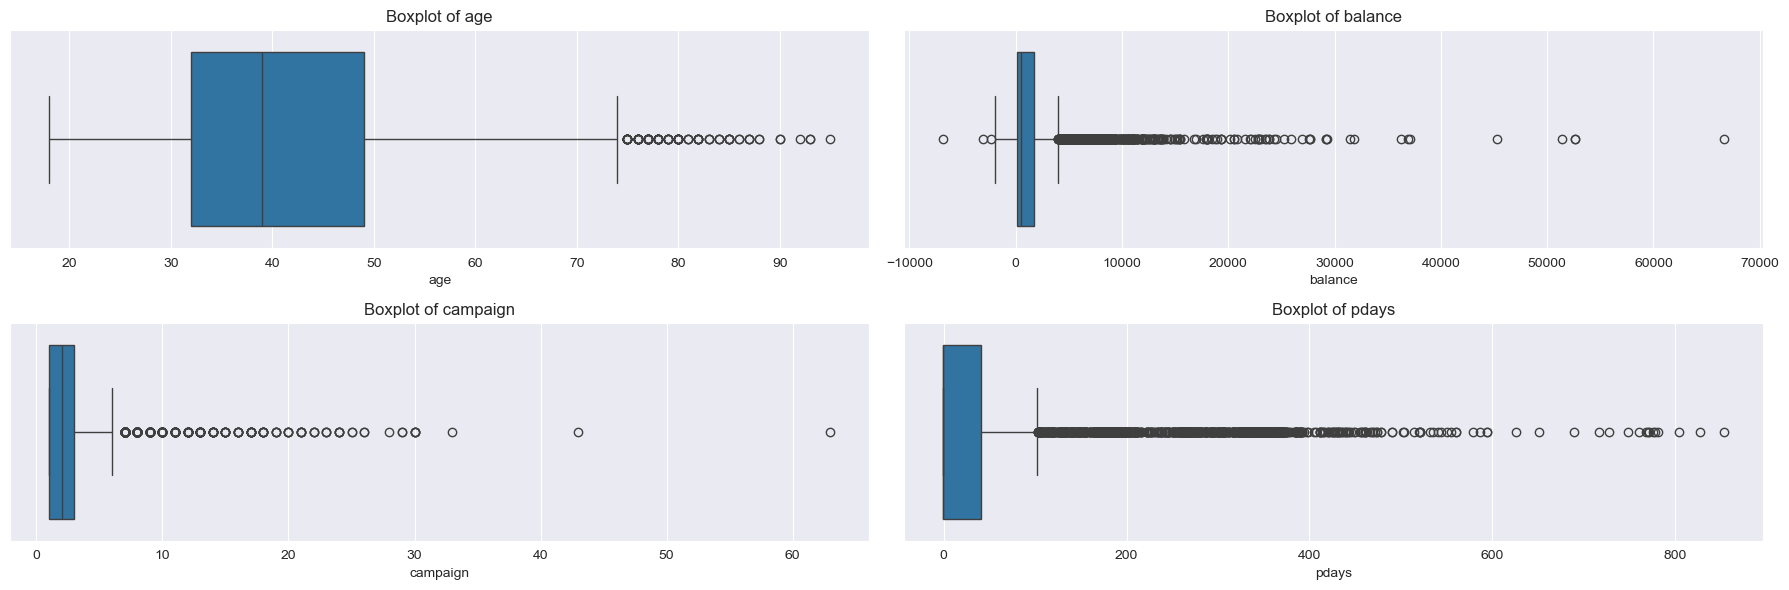

In [2158]:
plt.figure(figsize= (18,6))
plot_index = 1

for i in numerical:
    ax = plt.subplot(2, 2, plot_index)
    sns.boxplot(x= df[i])
    plt.title(f"Boxplot of {i}")
    plot_index += 1

plt.tight_layout()
plt.show()

Based on bank dataset context, banks has diverse customer and each with their own treatment, and as they are all valid data that represents real world behaviour, I will leave the outliers as is to help the machine learning model "learn".

# **4. Modelling**

## **4.1 Preprocessing**

for the preprocessing methods, I will make to transformer to see which transformer make the model better, which is: <br>
Transformer 1
- Encoder:
    - Ordinal Encoder: `month`; ordinal type data
    - One Hot Encoder: `job`, `housing`, `loan`, `contact`, `poutcome`; nominal type data, relatively low cardinality in each column, therefore I will be using One Hot Encoder.

Transformer 2
- Encoder:
    - One Hot Encoder: `job`, `housing`, `loan`, `contact`, `month`, `poutcome`; relatively low cardinality in each column, therefore I will be using One Hot Encoder.

- Scaler:
    - Robust Scaler; each numerical column has vastly different ranges, and there are outliers. 

note: scaler may or may not be used depending on the choosen model.

In [2159]:
ordinal_mapping = [{"col": "month", "mapping": {None: 0, "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}}]

transformer1 = ColumnTransformer([("ordinal", OrdinalEncoder(cols= ["month"], mapping= ordinal_mapping), ["month"]),
                                 ("onehot", OneHotEncoder(), ["job", "housing", "loan", "contact", "poutcome"])
                                 ], remainder= "passthrough")

In [2160]:
transformer2 = ColumnTransformer([("onehot", OneHotEncoder(sparse_output= False), ["job", "housing", "loan", "month", "contact", "poutcome"])
                                 ], remainder= "passthrough")

In [2161]:
robust = RobustScaler(with_centering= False)
standard = StandardScaler(with_mean= False)

## **4.2 Data Splitting**

In [2162]:
df["deposit"].value_counts(normalize= True)

deposit
no     0.522126
yes    0.477874
Name: proportion, dtype: float64

slight imbalance in target

In [2163]:
X = df.drop(columns=["deposit"])
y = np.where(df["deposit"] == "yes", 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

## **4.3 Model Benchmarking**

> **Benchmark with scale**

In [2164]:
logreg = LogisticRegression(random_state = 42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state = 42)
xg = XGBClassifier(random_state = 42)
gb = GradientBoostingClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)

scale_model = [logreg, knn, tree, xg, gb, rf]
scale_mean = []
scale_std = []

for i in scale_model:
    
    skfold = StratifiedKFold(n_splits = 5, shuffle= True, random_state= 42)

    estimator = Pipeline([('prep', transformer2), 
                           ('scaler', robust), 
                           ('model', i)])
    
    scale_model_cv = cross_val_score(estimator, 
                                     X_train, 
                                     y_train, 
                                     cv = skfold, 
                                     scoring = 'precision',
                                     error_score= "raise", 
                                     n_jobs= -1)

    scale_mean.append(scale_model_cv.mean())
    scale_std.append(scale_model_cv.std())

    print(i , scale_model_cv)

pd.DataFrame({'scale_model': scale_model, 
              'scale_mean': scale_mean,
              'scale_std': scale_std}).sort_values(["scale_mean", 'scale_std'], ascending= [False, True])

LogisticRegression(random_state=42) [0.76470588 0.75982533 0.71655329 0.73221757 0.74122807]
KNeighborsClassifier() [0.68871595 0.65784832 0.65601504 0.67542214 0.69387755]
DecisionTreeClassifier(random_state=42) [0.61578045 0.62689076 0.62798635 0.61945392 0.60245184]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=No

,scale_model,scale_mean,scale_std
4,GradientBoostingClassifier(random_state=42),0.764474,0.015247
0,LogisticRegression(random_state=42),0.742906,0.017737
5,RandomForestClassifier(random_state=42),0.716863,0.016816
3,"XGBClassifier(base_score=None, booster=None, c...",0.715660,0.021484
1,KNeighborsClassifier(),0.674376,0.015475
2,DecisionTreeClassifier(random_state=42),0.618513,0.009233


> **Benchmark without scale**

In [2165]:
nonscale_model = [logreg, knn, tree, xg, gb, rf]
nonscale_mean = []
nonscale_std = []

for i in nonscale_model:
    
    skfold = StratifiedKFold(n_splits = 5, shuffle= True, random_state= 42)

    estimator = Pipeline([('prep', transformer2),  
                          ('model', i)])
    
    nonscale_model_cv = cross_val_score(estimator, 
                                        X_train, 
                                        y_train, 
                                        cv = skfold, 
                                        scoring = 'precision', 
                                        error_score='raise',
                                        n_jobs= -1)

    nonscale_mean.append(nonscale_model_cv.mean())
    nonscale_std.append(nonscale_model_cv.std())

    print(i , nonscale_model_cv)

pd.DataFrame({'nonscale_model': nonscale_model, 
              'nonscale_mean': nonscale_mean,
              'nonscale_std': nonscale_std}).sort_values(["nonscale_mean", 'nonscale_std'], ascending= [False, True])

LogisticRegression(random_state=42) [0.68571429 0.73137255 0.61214953 0.67590988 0.63577236]
KNeighborsClassifier() [0.57976654 0.58938053 0.52707581 0.55860806 0.57552581]
DecisionTreeClassifier(random_state=42) [0.61472603 0.62689076 0.62564103 0.61880342 0.60350877]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=No

,nonscale_model,nonscale_mean,nonscale_std
4,GradientBoostingClassifier(random_state=42),0.764474,0.015247
5,RandomForestClassifier(random_state=42),0.717478,0.017981
3,"XGBClassifier(base_score=None, booster=None, c...",0.715660,0.021484
0,LogisticRegression(random_state=42),0.668184,0.041353
2,DecisionTreeClassifier(random_state=42),0.617914,0.008471
1,KNeighborsClassifier(),0.566071,0.021893


Based on the model benchmark, I will choose the model with the balance in high mean score and the low standard deviation, which is `GradientBoostingClassifier` either with scaling or not, for our Machine Learning Model.

## **4.4 Hyperparameter Tuning**

In [2166]:
estimator = Pipeline([("preprocess", transformer2),
                      ("clf", gb)])

skfold = StratifiedKFold(n_splits = 5, shuffle= True, random_state= 42)

hyperparam_dist = {"clf__learning_rate": np.linspace(0.01, 0.1), 
                   "clf__n_estimators": np.arange(100,501),
                   "clf__subsample": np.linspace(0.2, 1, 10),
                   "clf__min_samples_split": np.arange(2,10),
                   "clf__min_samples_leaf": np.arange(1,10),
                   "clf__max_depth": np.arange(3,10),
                   "clf__max_features": ["sqrt", "log2", None],
                   "preprocess": [transformer1, transformer2]}

random_search = RandomizedSearchCV(estimator,
                                   param_distributions= hyperparam_dist,
                                   n_iter= 100,
                                   scoring= "precision",
                                   n_jobs= -1,
                                   cv = skfold,
                                   random_state= 42)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(sparse_output=False),
                                                                               ['job',
                                                                                'housing',
                                                                                'loan',
                                                                                'month',
                                                                                'contact',
                                                                                'poutcome'])])),
                                             ('clf',
                                              GradientBoostingClassifier(random_state=42))]),
                   n_iter=100, n_jobs=...
                                                                                                                 'mapping': None     0
jan      1
feb      2
mar      3
apr      4
may      5
jun      6
jul      7
aug      8
sep      9
oct     10
nov     11
dec     12
dtype: int64}]),
                                                                                        ['month']),
                                                                                       ('onehot',
                                                                                        OneHotEncoder(),
                                                                                        ['job',
                                                                                         'housing',
                                                                                         'loan',
                                                                                         'contact',
                                                                                         'poutcome'])]),
                                                       ColumnTransformer(remainder='passthrough',
                                                                         transformers=[('onehot',
                                                                                        OneHotEncoder(sparse_output=False),
                                                                                        ['job',
                                                                                         'housing',
                                                                                         'loan',
                                                                                         'month',
                                                                                         'contact',
                                                                                         'poutcome'])])]},
                   random_state=42, scoring='precision')

In [2167]:
print('best score',random_search.best_score_)
print('best param',random_search.best_params_)

best score 0.7794638095482914
best param {'preprocess': ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(sparse_output=False),
                                 ['job', 'housing', 'loan', 'month', 'contact',
                                  'poutcome'])]), 'clf__subsample': 0.5555555555555556, 'clf__n_estimators': 121, 'clf__min_samples_split': 3, 'clf__min_samples_leaf': 8, 'clf__max_features': None, 'clf__max_depth': 4, 'clf__learning_rate': 0.01}


After hyperparameter tuning we can see that the models precision score increase from 0.764 to 0.779

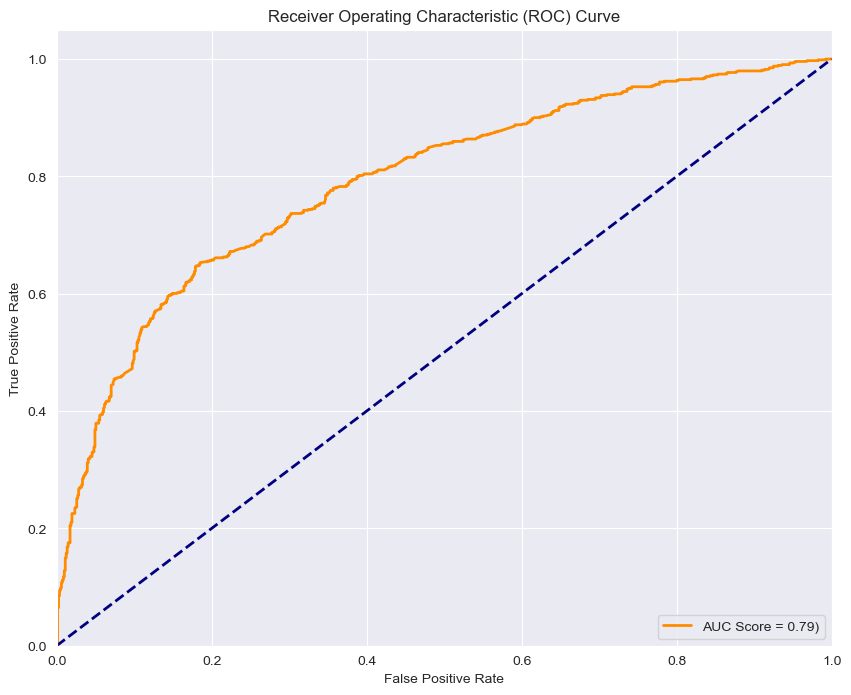

In [2168]:
best_gb = random_search.best_estimator_

# Predict probabilities
y_pred_prob = best_gb.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC Score = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Model performance based on ROC Curve and AUC Score: <br>
- ROC Curve: <br>
The curve (orange line) indicates how the model perform and the diagonal (blue line) indicates if the model does not have any predictive value or it just random guessing. Based on the graph, we can see that the GBC model is above the diagonal line which means that it has a predictive value.

- AUC Score: <br>
With AUC Score of 0.79, we can conclude that this GBC model is quite good at distinguishing customer who will subscribe to a term deposit and customer who wont.


# **5. Evaluation**

## **5.1 Final Result Comparison**

- **Model before hyperparameter tuning**

In [2169]:
gb = GradientBoostingClassifier(random_state = 42)

estimator = Pipeline([("preprocess", transformer2),
                      ("clf", gb)])

estimator.fit(X_train, y_train)

y_pred_base = estimator.predict(X_test)

print(f"Presicion Score for base model: {precision_score(y_test,y_pred_base)}")
print("")
print(classification_report(y_test,y_pred_base))

Presicion Score for base model: 0.7837837837837838

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       810
           1       0.78      0.63      0.70       741

    accuracy                           0.74      1551
   macro avg       0.75      0.73      0.73      1551
weighted avg       0.75      0.74      0.74      1551



- **Model after hyperparameter tuning**

In [2170]:
gb_final = random_search.best_estimator_

gb_final.fit(X_train, y_train)

y_pred_tuned = gb_final.predict(X_test)

print(f"Presicion score for tuned model: {precision_score(y_test,y_pred_tuned)}")
print("")
print(classification_report(y_test,y_pred_tuned))

Presicion score for tuned model: 0.790990990990991

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       810
           1       0.79      0.59      0.68       741

    accuracy                           0.73      1551
   macro avg       0.74      0.72      0.72      1551
weighted avg       0.74      0.73      0.73      1551



Here are the comparison between the chosen model, which is GradientBoostClassifier, with and without tuning. We can see that, with hyperparameter tuning the precision score increase from 0.7837 to 0.7909, but with a slight decrease on the accuracy from 0.74 to 0.73<br>

Therefore, the chosen model is **Gradient Boosting Classifier**.

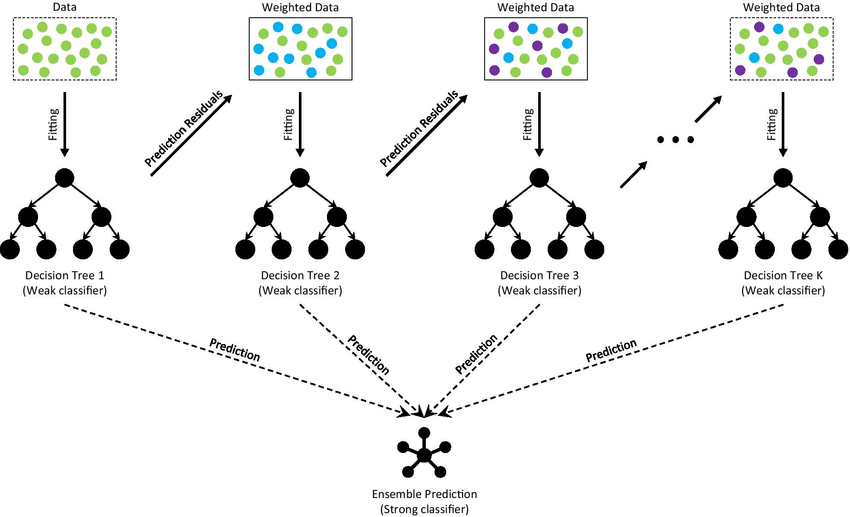

The GradientBoostingClassifier is a machine learning algorithm used for classification tasks. It belongs to the family of ensemble methods and builds a strong predictive model by combining multiple weak learners (usually decision trees). <br>

steps:
1. Initialize the Model
2. Compute Residuals (Pseudo-residuals)
3. Train a Weak Learner
4. Update the Model
5. Repeat

## **5.2 Confusion Matrix**

Text(0.5, 1.0, 'Tuned Model GB')

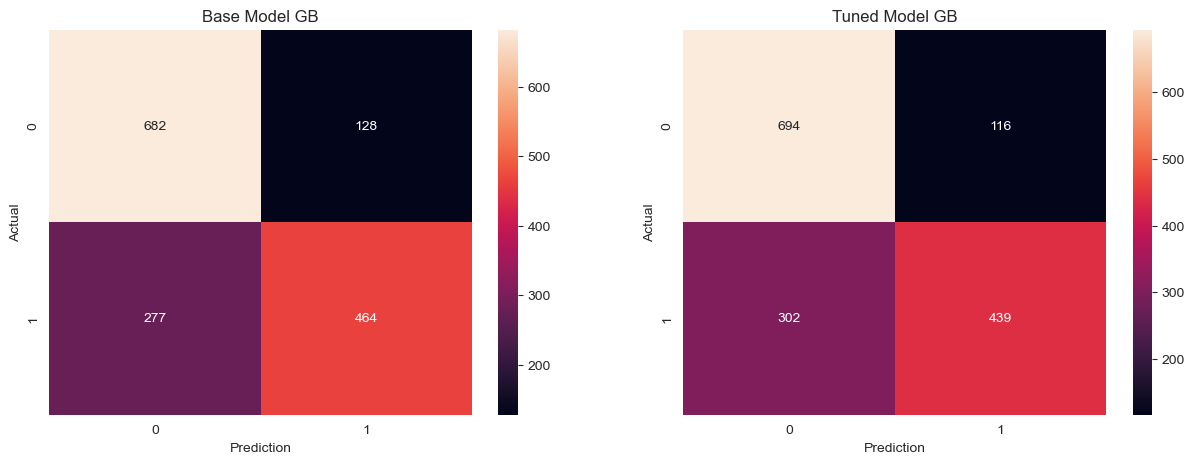

In [2178]:
plt.figure(figsize= (15, 5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_base), annot=True, fmt='g')
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title('Base Model GB')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='g')
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title('Tuned Model GB')

> **Business Insight**: <br>

Using the same assumptions as in the `Introduction` part, we have marketing budget/cost per customer = $12.18 

**Model before tuning**:
- True Negative = 682 customer; predicted to not subscribe to a term deposit and actually dont.
- False Positive (Type 1 Error) = 128 customer; predicted to subscribe to a term deposit but actually dont.
- False Negative (Type 2 Error) = 277 customer; predicted to not subscribe to a term deposit but actually do.
- True Positive = 464 customer; predicted to subscribe to a term deposit and actually do.

Estimate marketing cost to customer who are predicted to subscribe to a term deposit with model before tuning = (464 + 128) * 12.18 = $7210.56 <br>

**Model after tuning**:
- True Negative = 694 customer; predicted to not subscribe to a term deposit and actually dont.
- False Positive (Type 1 Error) = 116 customer; predicted to subscribe to a term deposit but actually dont.
- False Negative (Type 2 Error) = 302 customer; predicted to not subscribe to a term deposit but actually do.
- True Positive = 439 customer; predicted to subscribe to a term deposit and actually do.

Estimate marketing cost to customer who are predicted to subscribe to a term deposit with model after tuning = (439 + 116) * 12.18 = $6759.9

**Difference before and after model tuning**:
- Marketing Cost = $7210.56 - $6759.9 = **$450.66**
- Percentage = (450.66 / 7210.56) * 100 = **6.25%**

By tuning the model we save $450.66 or 6.25% in campaign marketing cost

## **5.3 Feature Importance**

In [ ]:
features = list(transformer2.get_feature_names_out())
features 

['onehot__job_admin',
 'onehot__job_blue-collar',
 'onehot__job_entrepreneur',
 'onehot__job_housemaid',
 'onehot__job_management',
 'onehot__job_retired',
 'onehot__job_self-employed',
 'onehot__job_services',
 'onehot__job_student',
 'onehot__job_technician',
 'onehot__job_unemployed',
 'onehot__housing_no',
 'onehot__housing_yes',
 'onehot__loan_no',
 'onehot__loan_yes',
 'onehot__month_apr',
 'onehot__month_aug',
 'onehot__month_dec',
 'onehot__month_feb',
 'onehot__month_jan',
 'onehot__month_jul',
 'onehot__month_jun',
 'onehot__month_mar',
 'onehot__month_may',
 'onehot__month_nov',
 'onehot__month_oct',
 'onehot__month_sep',
 'onehot__contact_cellular',
 'onehot__contact_telephone',
 'onehot__contact_unknown',
 'onehot__poutcome_failure',
 'onehot__poutcome_success',
 'onehot__poutcome_unknown',
 'remainder__age',
 'remainder__balance',
 'remainder__campaign',
 'remainder__pdays']

In [ ]:
feature_names = [item.split('__')[1] for item in features]
feature_names

['job_admin',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown',
 'age',
 'balance',
 'campaign',
 'pdays']

In [2187]:
importances = gb_final[-1].feature_importances_
importances

array([3.64962623e-04, 1.27670230e-03, 2.18583221e-04, 2.50395237e-04,
       5.48453283e-04, 9.99243169e-04, 0.00000000e+00, 1.77267613e-04,
       1.78039358e-03, 1.29173896e-03, 4.20665129e-05, 3.25373871e-02,
       2.55835146e-02, 4.77315352e-03, 8.14875739e-03, 2.14372670e-02,
       2.53885306e-03, 0.00000000e+00, 5.42912651e-04, 0.00000000e+00,
       8.29917100e-04, 2.85385318e-02, 2.87490713e-02, 8.84534885e-03,
       5.55814905e-03, 4.48535685e-02, 1.85438926e-03, 4.41565391e-02,
       5.38016371e-04, 1.55385385e-01, 4.83168614e-04, 3.44841653e-01,
       9.47553482e-04, 7.87371879e-02, 9.30970099e-02, 1.81871135e-02,
       4.18857449e-02])

In [2191]:
df_importances = pd.DataFrame({'Features': feature_names,
                               'Importance': importances}).sort_values('Importance', ascending= False)

df_importances

,Features,Importance
31,poutcome_success,0.344842
29,contact_unknown,0.155385
34,balance,0.093097
33,age,0.078737
25,month_oct,0.044854
27,contact_cellular,0.044157
36,pdays,0.041886
11,housing_no,0.032537
22,month_mar,0.028749
21,month_jun,0.028539


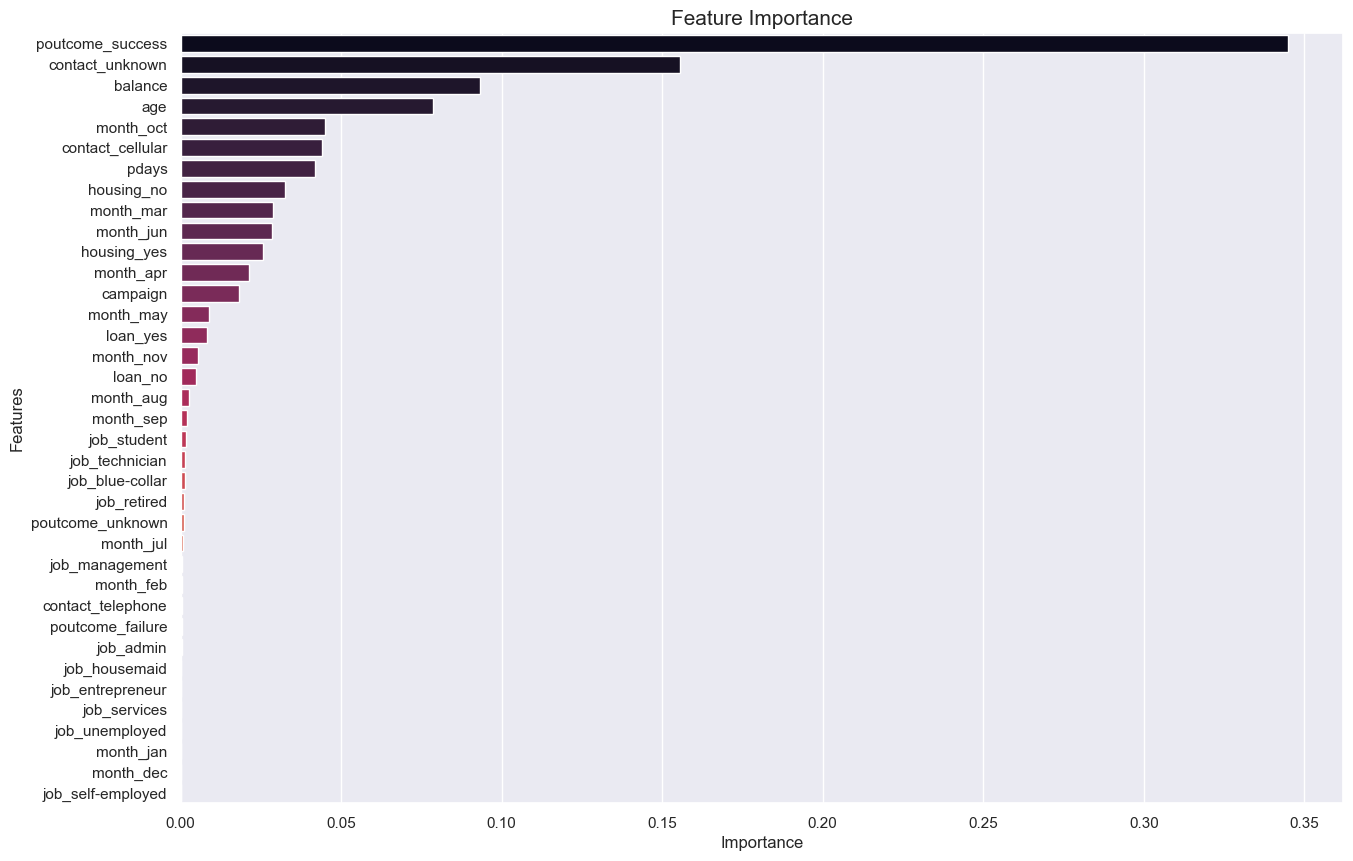

In [2210]:
plt.figure(figsize=(15, 10))
sns.barplot(data= df_importances, x= "Importance", y= "Features", palette= "rocket")
plt.title("Feature Importance", fontsize= 15)
plt.show()

> **Insight**: <br>

From the Feature Importance graph, we can extract several key insights about which features significantly impact the model's ability to predict whether a customer will subscribe to a term deposit:

**Most Important Features**:

- poutcome_success: Customers who had success in a prior campaign are highly likely to subscribe again.

- contact_unknown: The type of contact used plays an important role.

- balance: Customers with higher balances may have more capacity to subscribe to a term deposit.

- age: Age is a strong predictor, indicating that targeting certain age groups may yield better results.

**Moderately Important Features**:
- Features like pdays (number of days since last contact), housing loan status (housing_no and housing_yes), and contact month (month_oct, month_mar, etc.)

- These features might indicate customer readiness or financial situations that correlate with their likelihood of subscribing

With all those features such as, past result, method of contact, customers profile, and the timing of contacting, can be a business strategy for the marketing team to gain higher chance of success with their campaign.

## **5.4 SHAP**

 97%|=================== | 5996/6200 [00:11<00:00]       

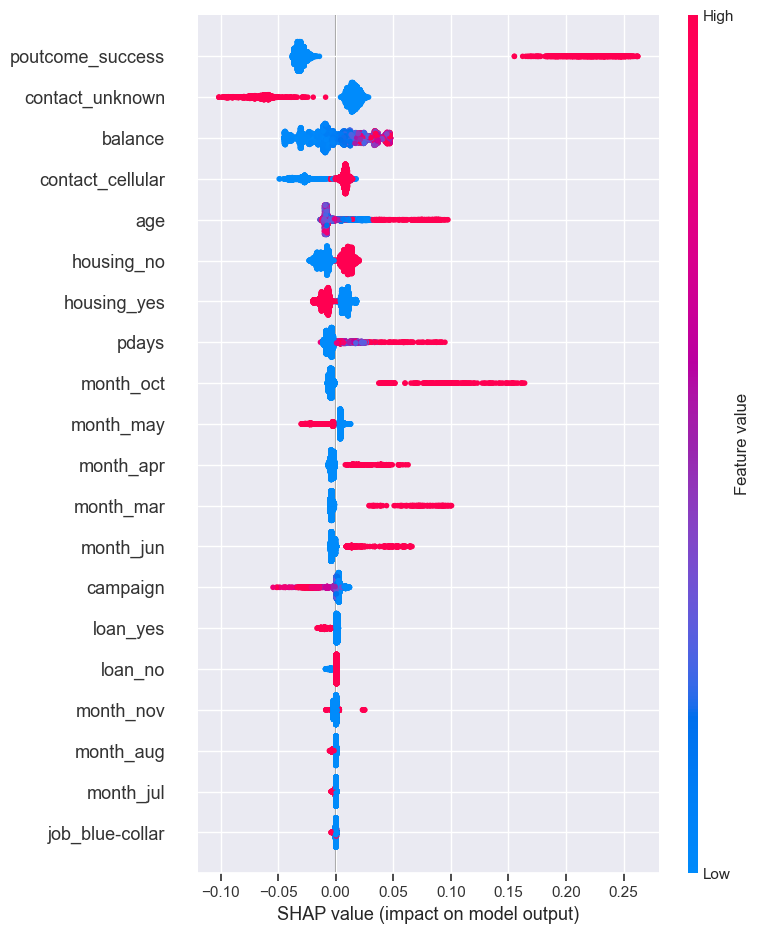

In [2215]:
gb_final.fit(X_train, y_train)

X_train_transformed = gb_final[:-1].transform(X_train)

explainer = shap.Explainer(gb_final.named_steps['clf'], X_train_transformed, feature_perturbation = 'interventional', model_output = 'probability')

shap_values = explainer(X_train_transformed)

shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)

> **Insight**: <br>

The SHAP summary plot above explains how each feature impact the model prediction, with the positive value representing the likelihood a customer subscribe to a term deposit and the negative value representing the likelihood customer doesn't subscribe to a term deposit.<br>

**Feature Explanation**:
1. `poutcome_success`: previous campaign success shows a higher chance for customer subscribing to a term deposit

2. `contact_unknown`: customer who are contacted with an unknown method shows a lower chance of subscribing to a term deposit

3. `balance`: customer who has high balance tends to subscribe to a term deposit, while customer who has low balance tends to not subscribe to a term deposit

4. `contact_cellular`: customer who are contacted with cellular tends to subscribe to a term deposit

5. `age`: older customer shows a higher chance for subscribing to a term deposit

6. `housing`: for housing loan, customer with no housing loan shows a tendency to subscribe to a term deposit, while customer with a housing loan shows a tendency to not subscribe

7. `pdays`: customer who are previously contacted shows a tendency to subscribe to a term deposit compared to customer who was not contacted in the previous campaign

8. `month`: months that has a higher chance for a customer to subscribe to a term deposit are October, April, March, June, November, and months that has a lower chance for a customer to subscribe are May, August, July

9. `loan`: customer with a personal loan shows a tendency to not subscribe to a term deposit, while customer without a personal loan shows neutral chance to subscribe to a term deposit

10. `job_blue-collar`: customer with a blue collar job shows a tendency to not subscribe to a term deposit

# **6. Conclusion and Recommendation**

> ## **Conclusion**
The Gradient Boosting Classifier, after hyperparameter tuning, has demonstrated improved performance in predicting customer subscriptions to term deposits. By prioritizing precision as the evaluation metric, the tuned model showed a slight but meaningful improvement in precision from 0.7837 (base model) to 0.7909, alongside a respectable AUC score of 0.79. This increase in precision directly translates to better targeting of customers likely to subscribe, minimizing unnecessary marketing efforts.

From a business perspective, the improved model reduces marketing campaign costs by $450.66 (6.25%). This savings highlights the value of investing in model optimization for a more efficient allocation of marketing resources.

The feature importance and SHAP analysis reveals critical factors influencing customer behavior:

1. poutcome_success: Previous campaign success strongly correlates with future subscriptions, making it essential to focus on re-engaging successful customers.

2. contact_unknown: The type of contact method impacts campaign results, unknown method shows a lower chance of subscribing to a term deposit,  suggesting opportunities to refine or further analyze this factor.

3. balance and age: Customers with higher balances and specific age groups are more likely to subscribe, enabling targeted marketing strategies.

4. Moderately significant features such as pdays (time since the last contact), housing loan status, and specific months (e.g., October and March) offer additional insights into customer readiness and seasonal trends, further informing campaign planning.

limitation of the model, it can only interpret the business perspective of reducing type 1 error for all customer with the same interest rate for their term deposit

> ## **Recommendations**
**1. Model**
- Even after the tuning, with a precision score of 0.7909, AUC score of 0.79 and accuracy of 0.73, the model still has a lot of room for improvement, one of the ways to improve the model would be adding new features, such as gender, marital status, credit score, etc.

- With a better computational power and more time, the iteration for parameter tuning can be increased to find a better parameter combination.

**2. Bank Marketing Team**
- Focus on customers with successful previous campaign outcomes for higher conversion rates.

- Tailor marketing materials and channels based on balance and age profiles of customers to better resonate with their needs and financial situations.

- Prioritize contact during high-performing months like October and March, and align marketing efforts with periods of higher customer receptivity.

- Reassess the model's precision and cost impact periodically to ensure continued alignment with business objectives and dynamic market conditions.

# **7. Deployment**

In [2216]:
import pickle

final_model = gb_final
# Fitting model to all data
final_model.fit(X_train, y_train)

# Save Model
pickle.dump(final_model, open('Capstone_3_GBC_Ardi.sav', 'wb'))